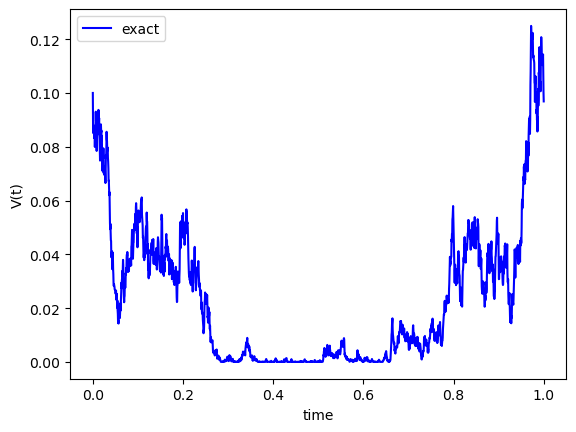

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def CIR_Sample(NoOfPaths,kappa,gamma,vbar,s,t,v_s):
    delta = 4.0 *kappa*vbar/gamma/gamma
    c= 1.0/(4.0*kappa)*gamma*gamma*(1.0-np.exp(-kappa*(t-s)))
    kappaBar = 4.0*kappa*v_s*np.exp(-kappa*(t-s))/(gamma*gamma*(1.0-np.exp(-kappa*(t-s))))
    sample = c* np.random.noncentral_chisquare(delta,kappaBar,NoOfPaths)
    return  sample

def GeneratePathsCIRExact(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    V = np.zeros([NoOfPaths, NoOfSteps+1])
    V[:,0]=v0
    
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        # Exact simualtion
        V[:,i+1] = CIR_Sample(NoOfPaths,kappa,gamma,vbar,0,dt,V[:,i])
                       
        time[i+1] = time[i] +dt
        
    # Outputs
    paths = {"time":time,"VExact":V}
    return paths

def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 2000
    T     = 1
    kappa =0.7
    v0    =0.1
    vbar  =0.1
    gamma =0.7

    np.random.seed(10)
    Paths = GeneratePathsCIRExact(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma)
    timeGrid = Paths["time"]
    V_exact = Paths["VExact"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(V_exact),'b')   
    plt.xlabel("time")
    plt.ylabel("V(t)")
    plt.legend(['exact'])     
    
mainCalculation()
